# Descriptive Statistics


Descriptive statistics give the first insights into your data. This notebook will guide you through using pandas to gather and display the basic statistics of your dataset.

#### Environment
To start, you will need a couple python modules. At the Anaconda prompt you can use pip to install the needed packages.

```pip install pandas
pip install ggplot```

#### Data
The data I use is available for downloaded from the kaggle housing challenge, a free login is requried.  

https://www.kaggle.com/camnugent/california-housing-prices/data

The data should reside in the same directory as this notbook, or the full path can be specified below.

In [136]:
# Jolynn Schmidt
# basic descriptive stats with Python
import pandas as pd

# set the filename and the name of the column we will explore
my_data = "housing.csv"
col_name = "housing_median_age"

#### Dataframes
Lets get started by just reading in the data and looking at it. The panda package has a function for reading in a csv file and creating a dataframe. The dataframe is a 2-dimensional labeled data structure and will include all rows and columns from the csv.

In [137]:
# read in the csv and check out the data
df = pd.read_csv(my_data)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Data type
You can view the data types for each column using .dtypes. The columns are referenced by the column heading.

In [13]:
#what are our data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

#### Series
For this example we are just going to look at a single column. To do this we will create a series. You can find out more about series and dataframes here: https://pandas.pydata.org/pandas-docs/version/0.22.0/dsintro.html  A series is a labeled array capable of holding any data type. The series does not include the column name, just the data.

In [140]:

colSeries = df[col_name]
colSeries.head(5)

0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: housing_median_age, dtype: float64

#### Describe
The first function we will run is describe. This will give you a series with a set of standard descriptive statistics. It is great for a quick overview but to use the data you then have to use series.get() 

In [141]:
col_describe = colSeries.describe()
print(col_describe)
type(col_describe)

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64


pandas.core.series.Series

In [150]:
col_count = col_describe.get('count')

#### Mean, Median, and Mode
It may be easier to get the data using individual functions. The great thing about dataframes and series is there is no need to loop over the data.

In [118]:
col_mean = colSeries.mean()
print(col_mean)

28.639486434108527


In [119]:
col_median = colSeries.median()
print(col_median)

29.0


In [120]:
# I don't understand this
col_mode = colSeries.mode()
print(col_mode)

0    52.0
dtype: float64


#### Min and Max
You can also collect the minimum value and the maximum value in a series.

In [126]:
col_min = colSeries.min()
print(col_min)

1.0


In [127]:
col_max = colSeries.max()
print(col_max)

52.0


#### Standard deviation, Quantiles, Variance, and Skew

In [128]:
col_std = colSeries.std()
print(col_std)

12.58555761211165


In [151]:
col_qtiles = colSeries.quantile([.25, .5, .75])
print(col_qtiles)

pct25 = (col_qtiles.get(0.25))
pct50 = (col_qtiles.get(0.50))
pct75 = (col_qtiles.get(0.75))

0.25    18.0
0.50    29.0
0.75    37.0
Name: housing_median_age, dtype: float64


In [95]:
colSeries.var()

158.39626040778148

In [66]:
colSeries.skew()

0.060330637599136865

# Graphing
Now that we have the descriptive statistics we can graph our data and look at it. To do this we will use Matplotlib and some numpy functions. The main tools we will use are boxplot and the histogram function. More information on histograms can be found here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Text(0.6,42,'Median Home Age')

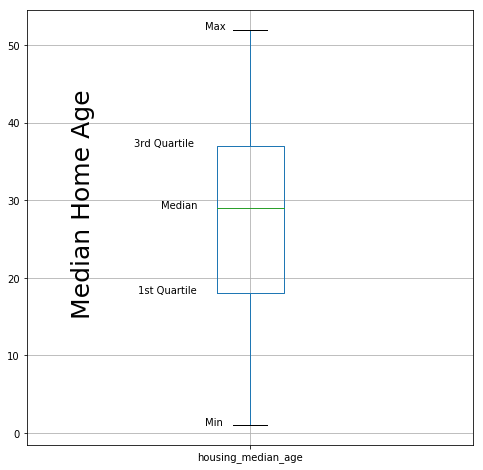

In [153]:
# this creates a boxplot 
df.boxplot(column="housing_median_age",
               return_type='axes',
               figsize=(8,8))
# this puts all the fancy labels in place.  I use the varialbes we 
# made above to set the label placement on the Y axis.
plt.text(x=0.74, y=pct75, s="3rd Quartile")
plt.text(x=0.8, y=col_median, s="Median")
plt.text(x=0.75, y=pct25, s="1st Quartile")
plt.text(x=0.9, y=col_min, s="Min")
plt.text(x=0.9, y=col_max, s="Max")
plt.text(x=0.6, y=42, s="Median Home Age", rotation=90, size=25)

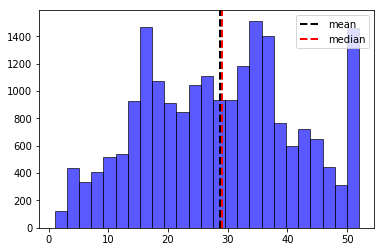

In [157]:


# this first line makes the hitogram with 25 bins
plt.hist(colSeries, bins=(25), color ='b', edgecolor='k', alpha = .65)

# these next two line create the mean and median lines
plt.axvline(col_mean, color='k', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(col_median, color='r', linestyle='dashed', linewidth=2, label='median')

# this creates the legend and includes all labels
plt.legend(loc='upper right')

# finally we need to show it
plt.show()

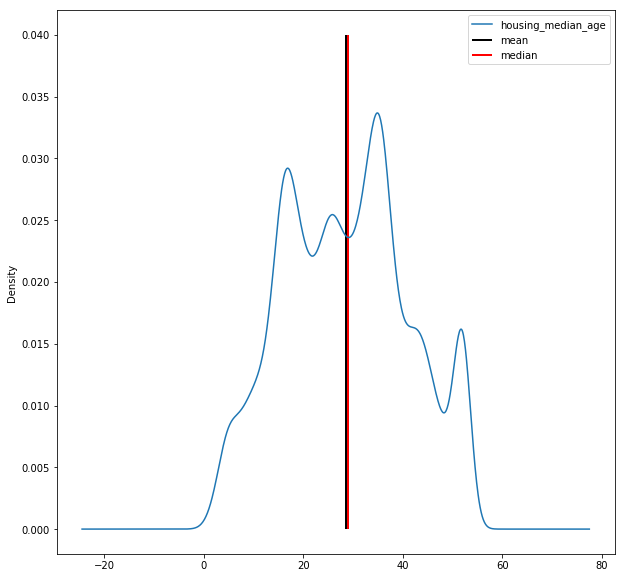

In [154]:
colSeries.plot(kind="density", figsize=(10,10))
plt.vlines(col_mean,     # Plot black line at mean
           ymin=0, 
           ymax=0.04,
           linewidth=2.0,
           label="mean")
plt.vlines(col_median,   # Plot red line at median
           ymin=0, 
           ymax=0.04, 
           linewidth=2.0,
           color="red",
           label="median")
plt.legend()

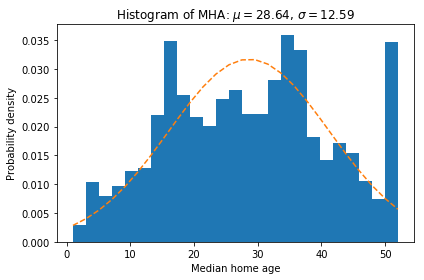

In [156]:
# This is pretty, but I am not sure what it is doing

mu = colSeries.mean()  # mean of distribution
sig = colSeries.std()  # standard deviation of distribution
x = colSeries

num_bins = 25

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sig)) *
     np.exp(-0.5 * (1 / sig * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Median home age')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of MHA: $\mu=%s$, $\sigma=%s$'%(round(mu, 2), round(sig, 2)))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()